In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
cars= pd.read_csv("data/cars.csv")

In [4]:
cars.head()

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American


In [5]:
cars.isnull().sum()

Model          0
Actual_MPG     0
Cylinders      0
Engine_Disp    0
Horsepower     0
Weight         0
Accelerate     0
Year           0
Origin         0
dtype: int64

In [6]:

cars.dtypes

Model           object
Actual_MPG     float64
Cylinders        int64
Engine_Disp    float64
Horsepower       int64
Weight           int64
Accelerate     float64
Year             int64
Origin          object
dtype: object

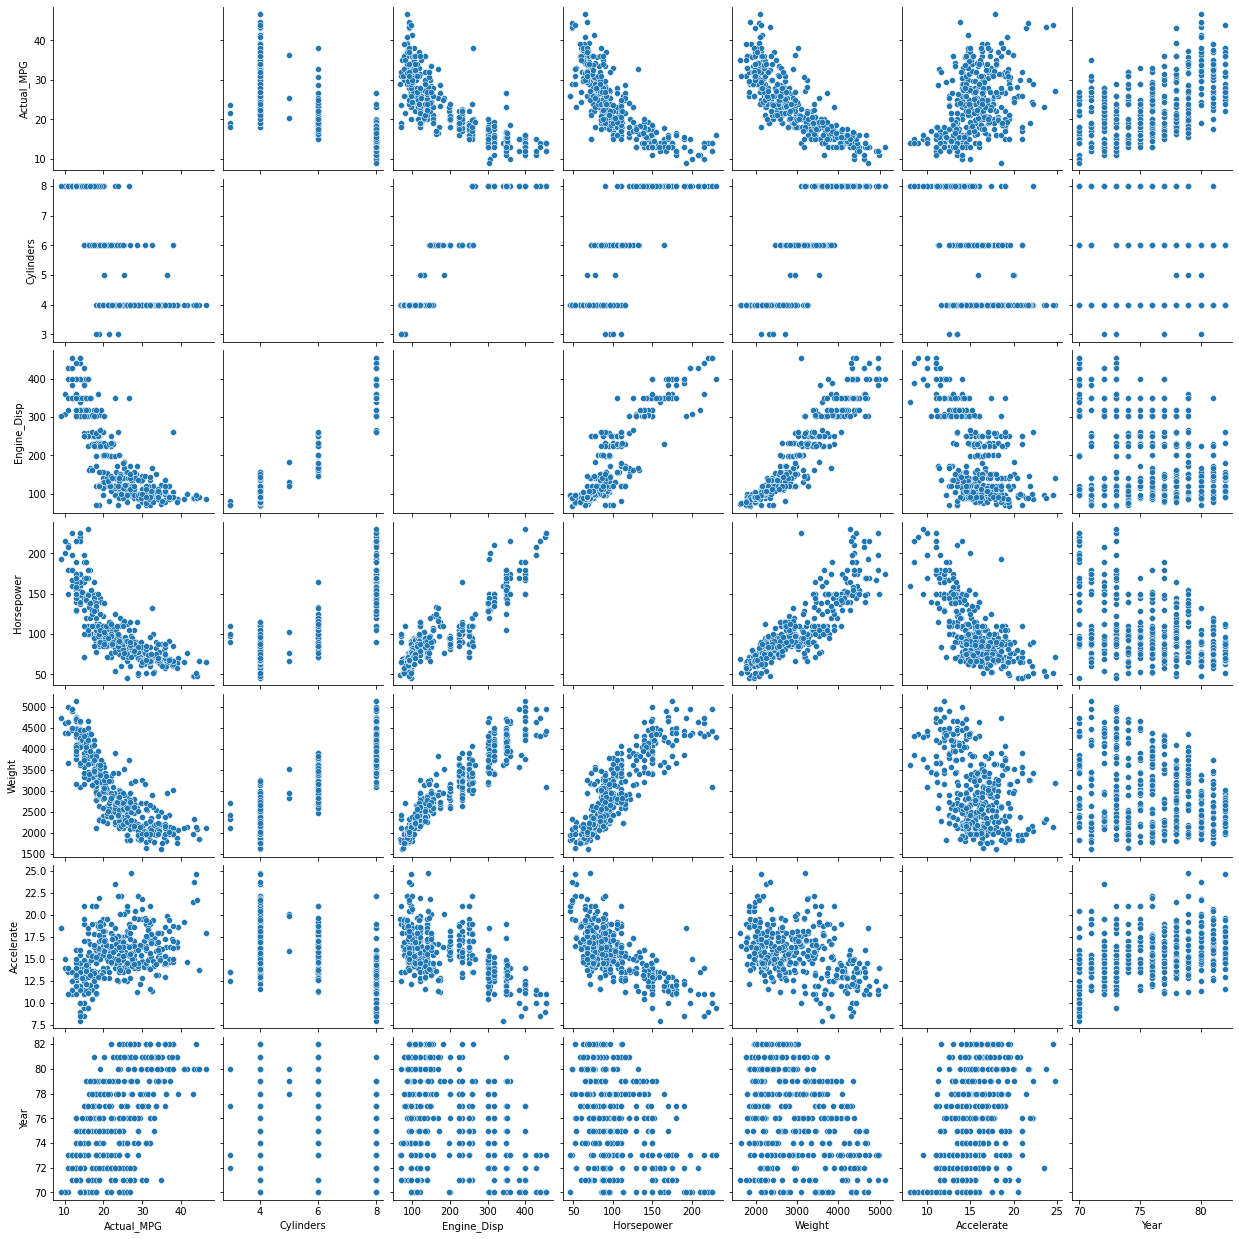

In [7]:
sns.pairplot(cars, diag_kind="hint")

<AxesSubplot:xlabel='Origin', ylabel='Actual_MPG'>

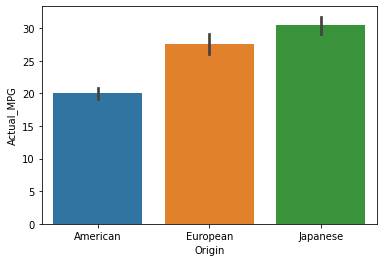

In [8]:
sns.barplot(x="Origin",y="Actual_MPG", data=cars)

<AxesSubplot:xlabel='Actual_MPG', ylabel='count'>

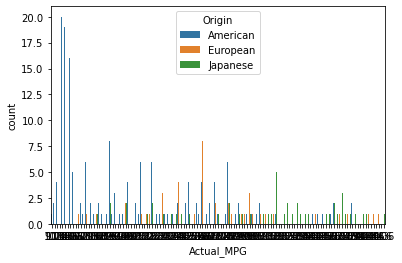

In [9]:
sns.countplot(x="Actual_MPG", hue="Origin",data=cars)

In [10]:
origin= pd.get_dummies(cars["Origin"],drop_first=True,prefix="Origin")

In [11]:
cars= pd.concat([cars, origin],axis=1)

In [12]:
cars.head()

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin,Origin_European,Origin_Japanese
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American,0,0
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American,0,0
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American,0,0
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American,0,0
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American,0,0


In [13]:
cars=cars.drop(labels=["Model","Origin","Year","Accelerate"],axis=1)


In [14]:
cars.head()

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Origin_European,Origin_Japanese
0,15.0,8,390.0,190,3850,0,0
1,21.0,6,199.0,90,2648,0,0
2,18.0,6,199.0,97,2774,0,0
3,16.0,8,304.0,150,3433,0,0
4,14.0,8,455.0,225,3086,0,0


In [15]:
X= cars.drop("Actual_MPG", axis=1)
y=cars["Actual_MPG"]

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=25)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [19]:
for a, col_name in enumerate(X_train.columns):
    print("The Coefficient for {} is : {}".format(col_name, lin_reg.coef_[a]))

The Coefficient for Cylinders is : -0.5063050345244993
The Coefficient for Engine_Disp is : 0.01224692990959042
The Coefficient for Horsepower is : -0.07176359956853395
The Coefficient for Weight is : -0.004518578677148302
The Coefficient for Origin_European is : 1.4708810569627253
The Coefficient for Origin_Japanese is : 2.8689656679650386


In [20]:
intercept= lin_reg.intercept_
intercept

43.876495608032286

In [21]:
lin_reg.score(X_test,y_test)

0.733842733314373

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
cars= pd.concat([X_train,y_train],axis=1)

In [24]:
cars.head()

,Cylinders,Engine_Disp,Horsepower,Weight,Origin_European,Origin_Japanese,Actual_MPG
148,4,71.0,65,1836,0,1,32.0
277,4,134.0,95,2560,0,1,27.5
186,4,85.0,52,2035,0,0,29.0
232,4,121.0,110,2600,1,0,21.5
175,4,121.0,98,2945,1,0,22.0


In [25]:
Incars= smf.ols(formula="Actual_MPG~+Cylinders+Engine_Disp+Horsepower+Weight+Origin_European+Origin_Japanese",data=cars).fit()

In [26]:
Incars.params

Intercept          43.876496
Cylinders          -0.506305
Engine_Disp         0.012247
Horsepower         -0.071764
Weight             -0.004519
Origin_European     1.470881
Origin_Japanese     2.868966
dtype: float64

In [27]:
print(Incars.summary())

                            OLS Regression Results                            
Dep. Variable:             Actual_MPG   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     119.9
Date:                Wed, 25 May 2022   Prob (F-statistic):           3.54e-75
Time:                        21:07:28   Log-Likelihood:                -838.69
No. Observations:                 294   AIC:                             1691.
Df Residuals:                     287   BIC:                             1717.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          43.8765      1.837     